In [ ]:
## Check the optimal location for STRB1

# 1 - Plot average waveforms for each ASIC at original settings
# 2 - Plot average waveform for each step for each ASIC
# 3 - Zoom in on interesting features

# Conclusion - Need better data to see how location affects Glitches

In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import os.path

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Setting plot default sizes
plt.rc('axes', titlesize = 40)
plt.rc('axes', labelsize = 30)
plt.rc('xtick', labelsize = 20)
plt.rc('ytick', labelsize = 20)
plt.rc('legend', fontsize = 20)
plt.rc('figure', titlesize = 40)
plt.figure(figsize(12,9))

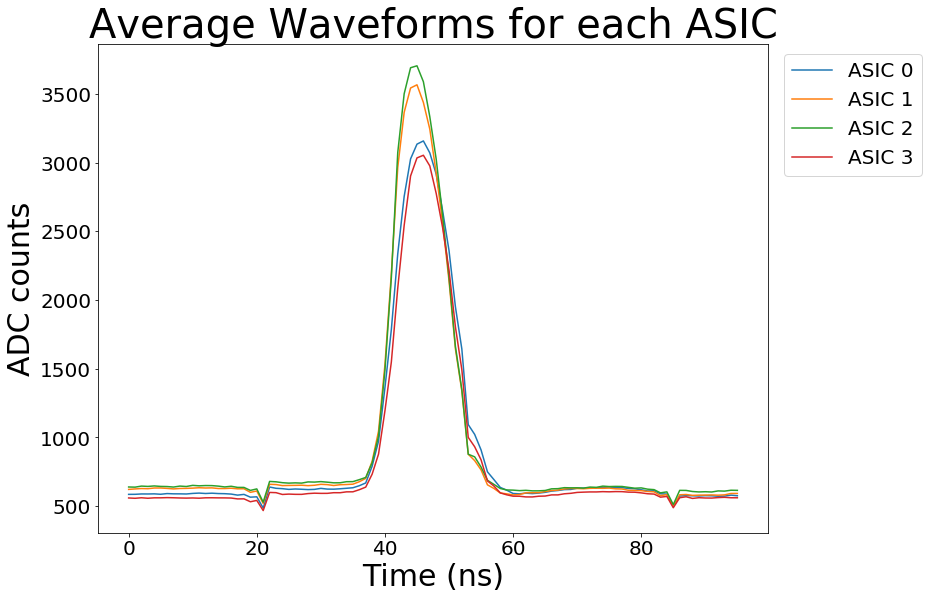

In [22]:
# Plot the original settings for each ASIC (Run 320012)

Original = []
for ASIC in range(4):
    data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/STRB1 Location Scan/sampleFileLarge_run320012ASIC" + str(ASIC) + "CH6.txt") 
    waveforms = []
    for event in range(5000):
        phase = int(data[event][4])
        shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
        waveforms.append(data[event][shift: (shift + 96)])
        #print(shift)
    avg_waveform = []
    for point in range(96):
        a = []
        for event in range(5000):
            a.append(waveforms[event][point])
        avg_waveform.append(np.mean(a))
    Original.append(avg_waveform)
    plt.plot(avg_waveform, label = 'ASIC ' + str(ASIC))
plt.title('Average Waveforms for each ASIC')
plt.ylabel('ADC counts')
plt.xlabel('Time (ns)')
plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
plt.show()

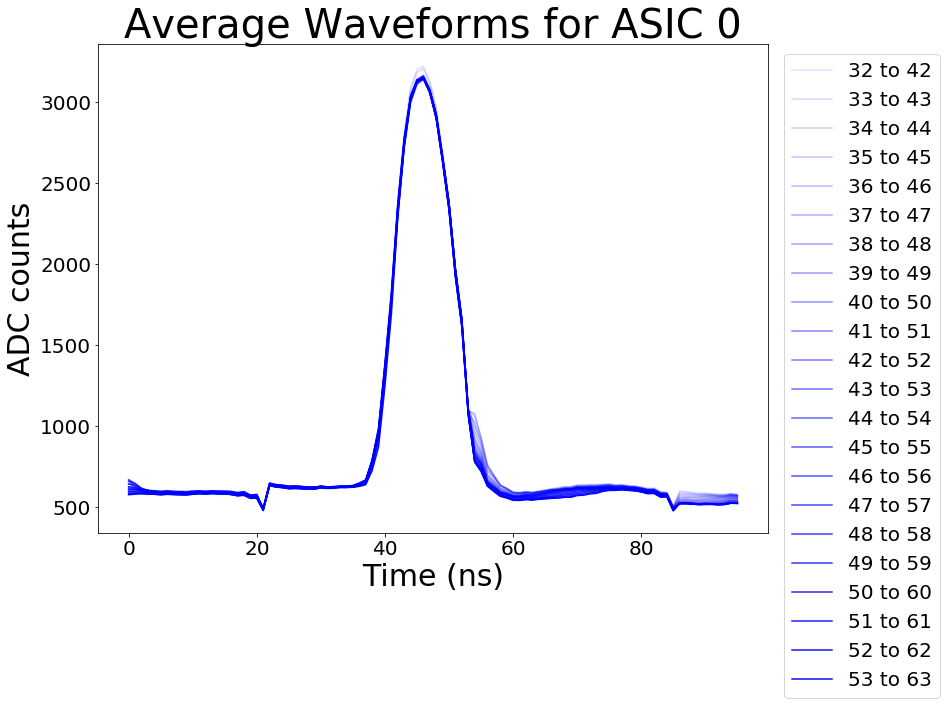

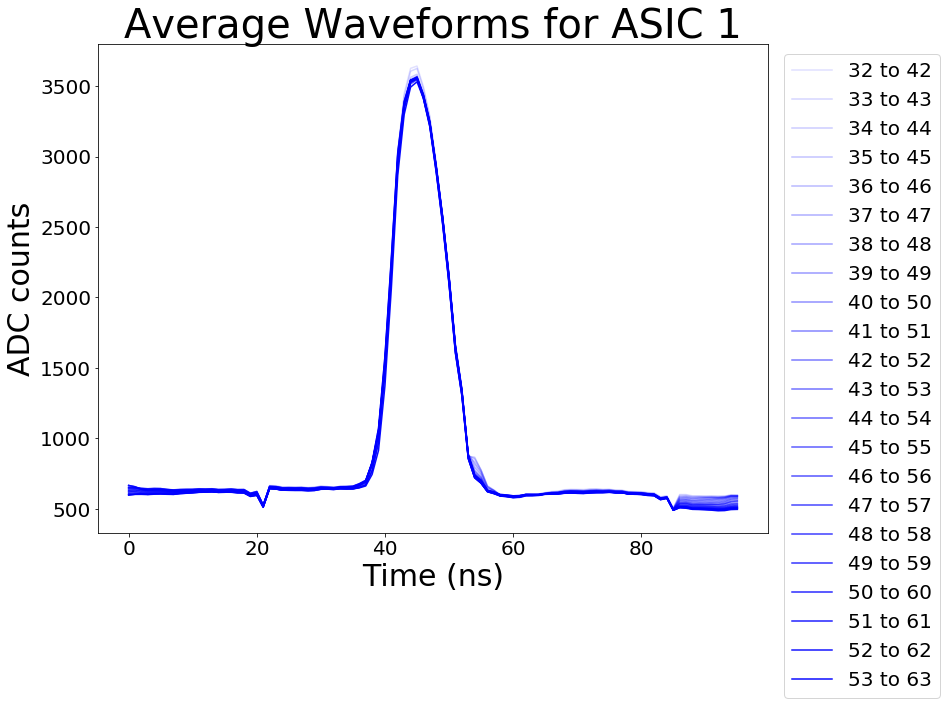

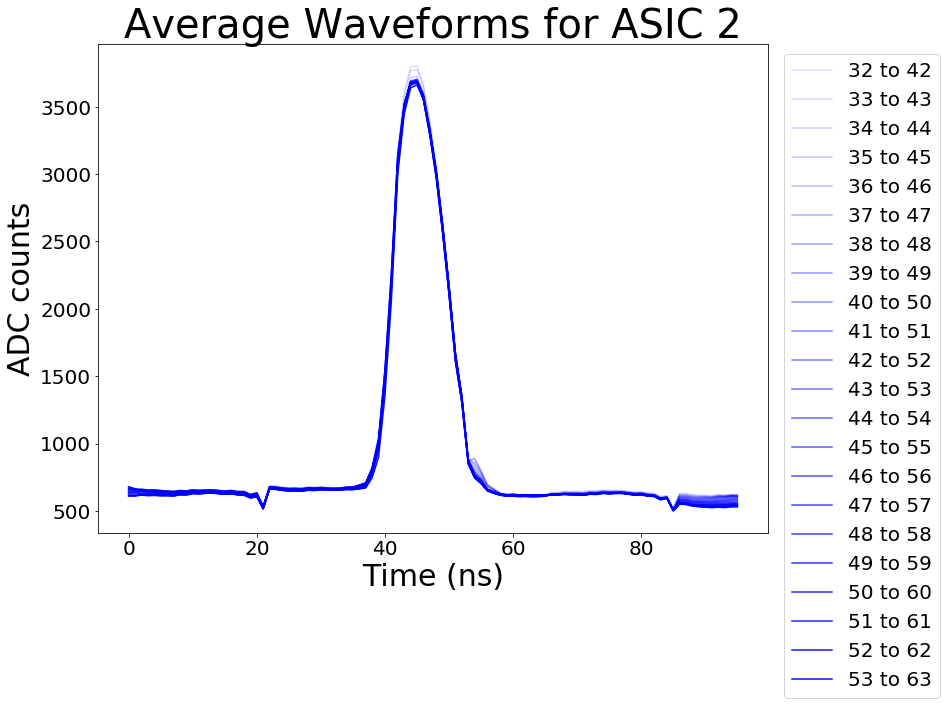

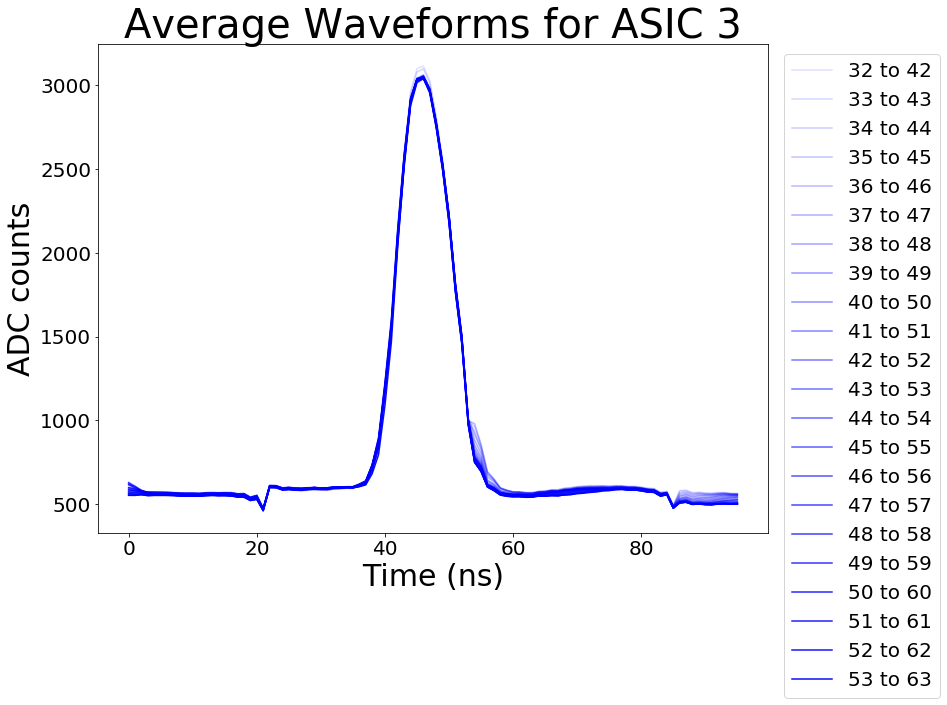

In [21]:
STRB1 = []
for ASIC in range(4):
    runs = []
    start_value = 32
    color = 0.12
    for run in range(320009,320031):
        data = np.loadtxt("/users/wipacuser/Desktop/CTA/Runs/STRB1 Location Scan/sampleFileLarge_run" + str(run) + "ASIC" + str(ASIC) + "CH6.txt")
        waveforms = []
        for event in range(5000):
            phase = int(data[event][4])
            shift = 32 - phase - 1 + 16*(phase>=16) - 16*(phase<16)
            waveforms.append(data[event][shift: shift+96])
        avg_waveform = []
        for point in range(96):
            a = []
            for event in range(5000):
                a.append(waveforms[event][point])
            avg_waveform.append(np.mean(a))
        runs.append(avg_waveform)
        plt.plot(avg_waveform, label = str(start_value) + ' to ' + str(start_value + 10), color = 'b', alpha = color)
        start_value = start_value + 1
        color = color + 0.04
    STRB1.append(runs)
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

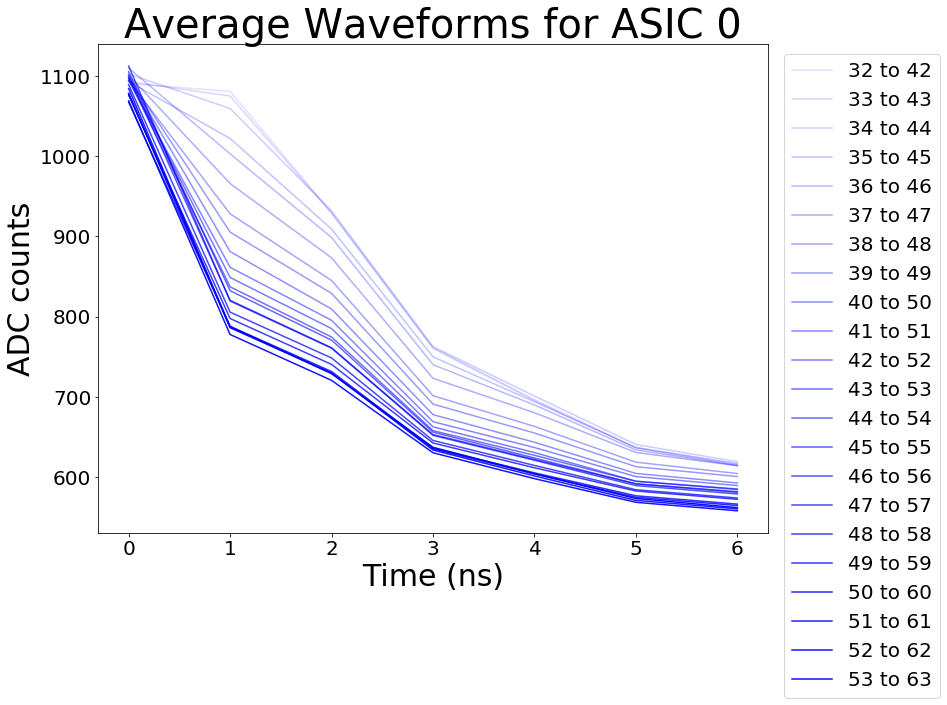

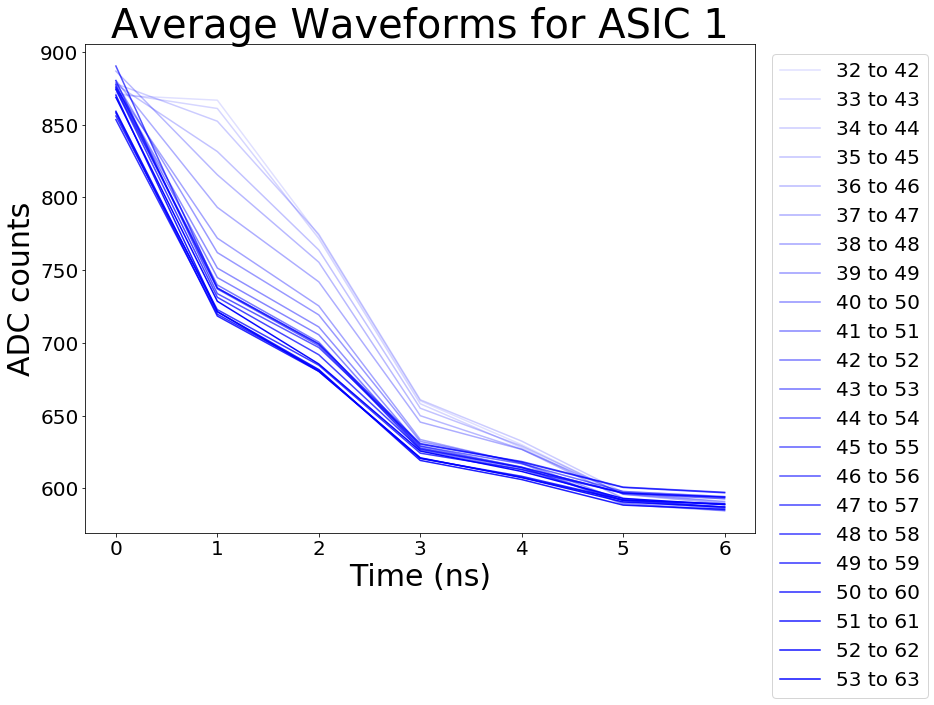

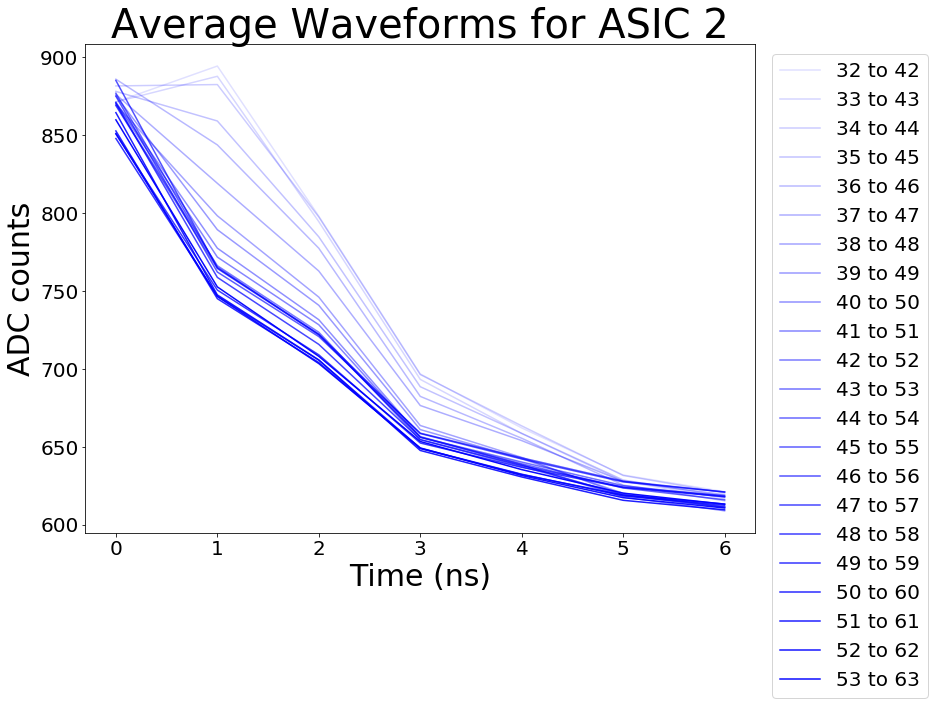

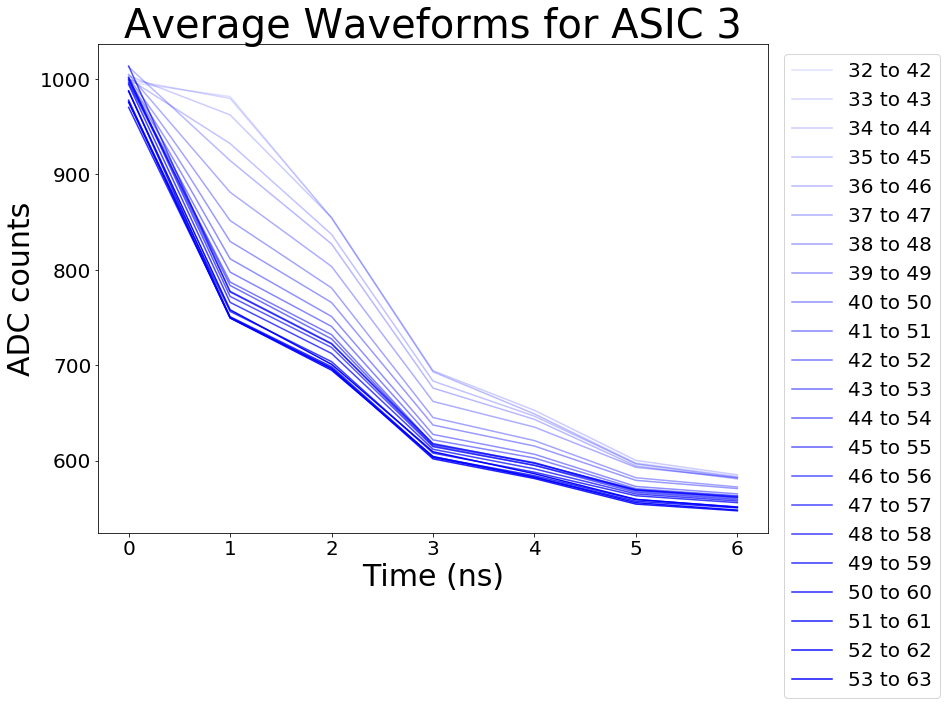

In [32]:
# Zoom in on just the glitch from 50 - 60

for ASIC in range(4):
    start_value = 32
    color = 0.12
    for run in range(22):
        plt.plot(STRB1[ASIC][run][53:60], label = str(start_value) + ' to ' + str(start_value + 10), color = 'b', alpha = color)
        start_value = start_value + 1
        color = color + 0.04
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

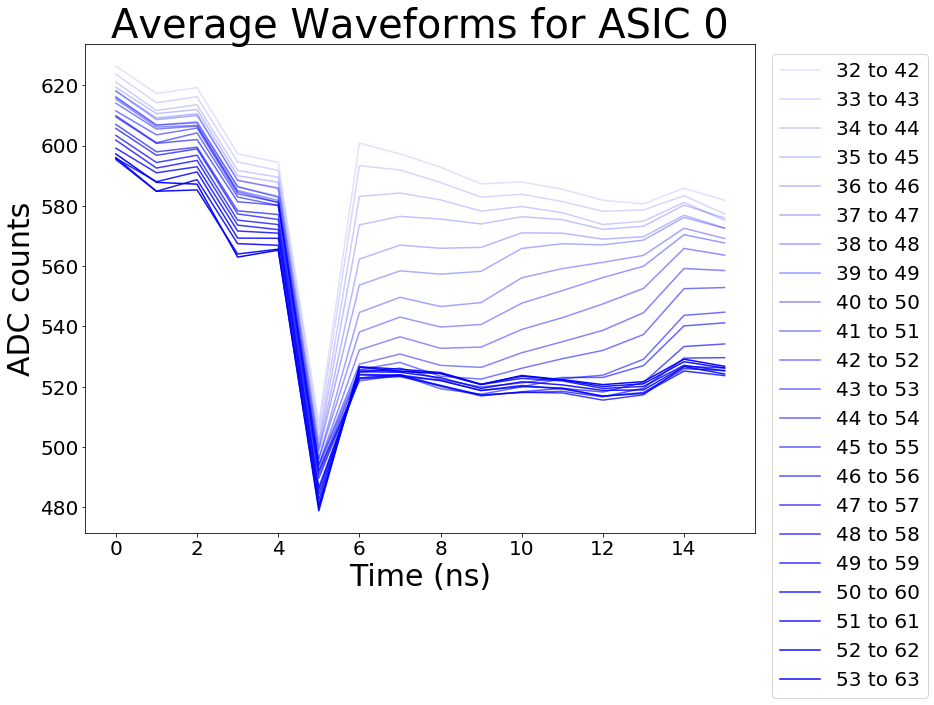

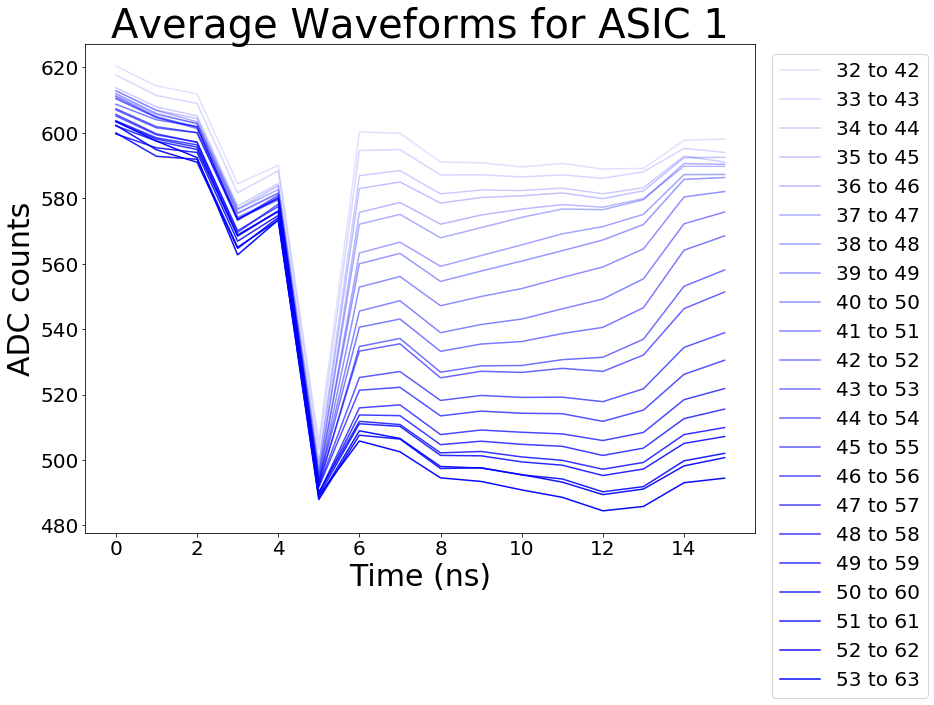

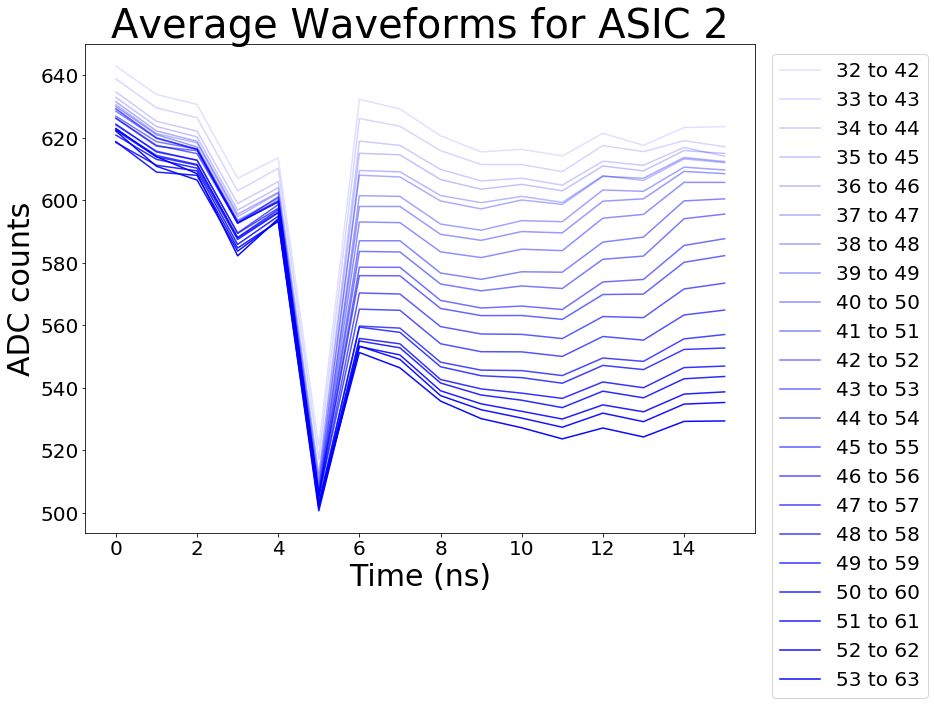

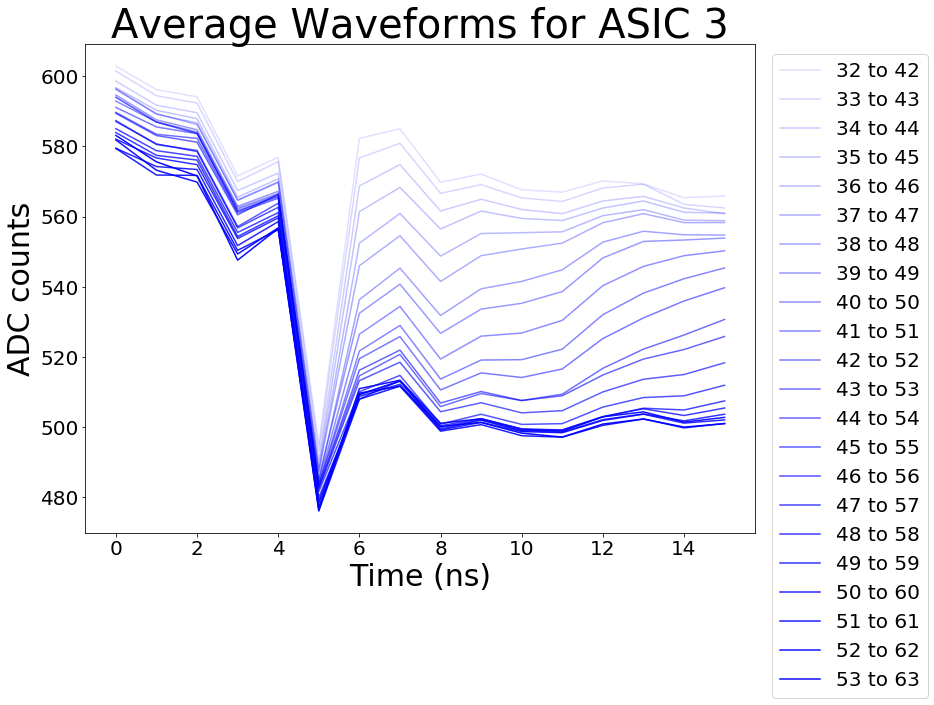

In [33]:
# Zoom in on just the glitch from 80 - 96

for ASIC in range(4):
    start_value = 32
    color = 0.12
    for run in range(22):
        plt.plot(STRB1[ASIC][run][80:96], label = str(start_value) + ' to ' + str(start_value + 10), color = 'b', alpha = color)
        start_value = start_value + 1
        color = color + 0.04
    plt.title('Average Waveforms for ASIC ' + str(ASIC))
    plt.ylabel('ADC counts')
    plt.xlabel('Time (ns)')
    plt.legend(bbox_to_anchor = (1.01,1),loc = 'upper left')
    plt.show()

In [ ]:
# plot value at 54 for each average waveform

